In [1]:
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
import numpy as np

In [2]:
dis = pd.read_csv("disease_interactome.csv")
dis = dis[['OFFICIAL_SYMBOL_A','OFFICIAL_SYMBOL_B']]
dis

,OFFICIAL_SYMBOL_A,OFFICIAL_SYMBOL_B
0,A2M,APOE
1,A2M,LEP
2,A2M,NGF
3,ABAT,ACP6
4,ABAT,ADSL
...,...,...
6138,ZNF746,IDH2
6139,ZNF76,LETM1
6140,ZNF836,TBCD
6141,ZSCAN29,ABAT


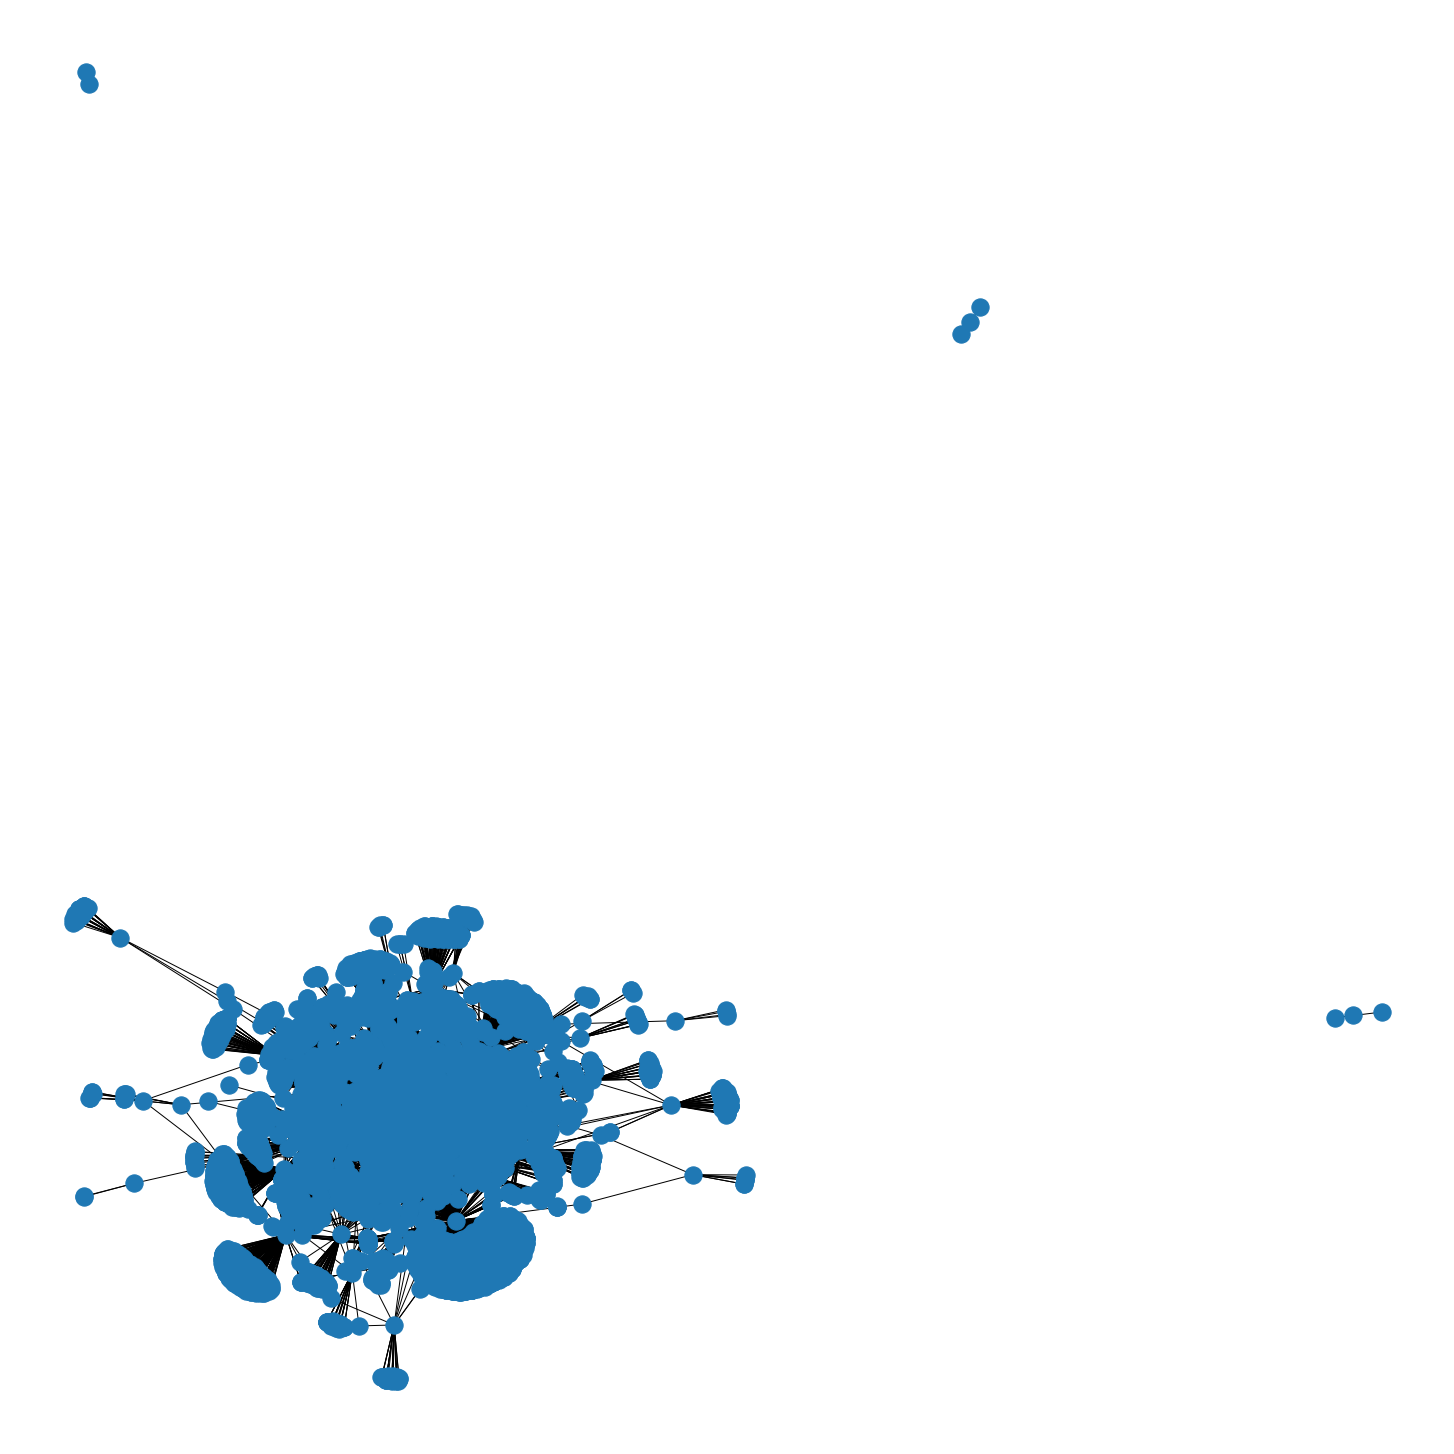

In [43]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(dis, 'OFFICIAL_SYMBOL_A',	'OFFICIAL_SYMBOL_B')

figure(figsize=(20, 20))
nx.draw(G, with_labels=False)

In [4]:
pip install markov_clustering[drawing]

In [5]:
pip install markov_clustering

In [7]:
import scipy 
import sklearn
import markov_clustering as mc

In [46]:
matrix = nx.adjacency_matrix(G)
# The rows and columns are ordered according to the nodes in nodelist. 
# If nodelist is None, then the ordering is produced by G.nodes().

# This means that nodes in the matrix are ordered like G.nodes. 
# So their cluster id should be their index inside G.nodes (???)

In [93]:
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

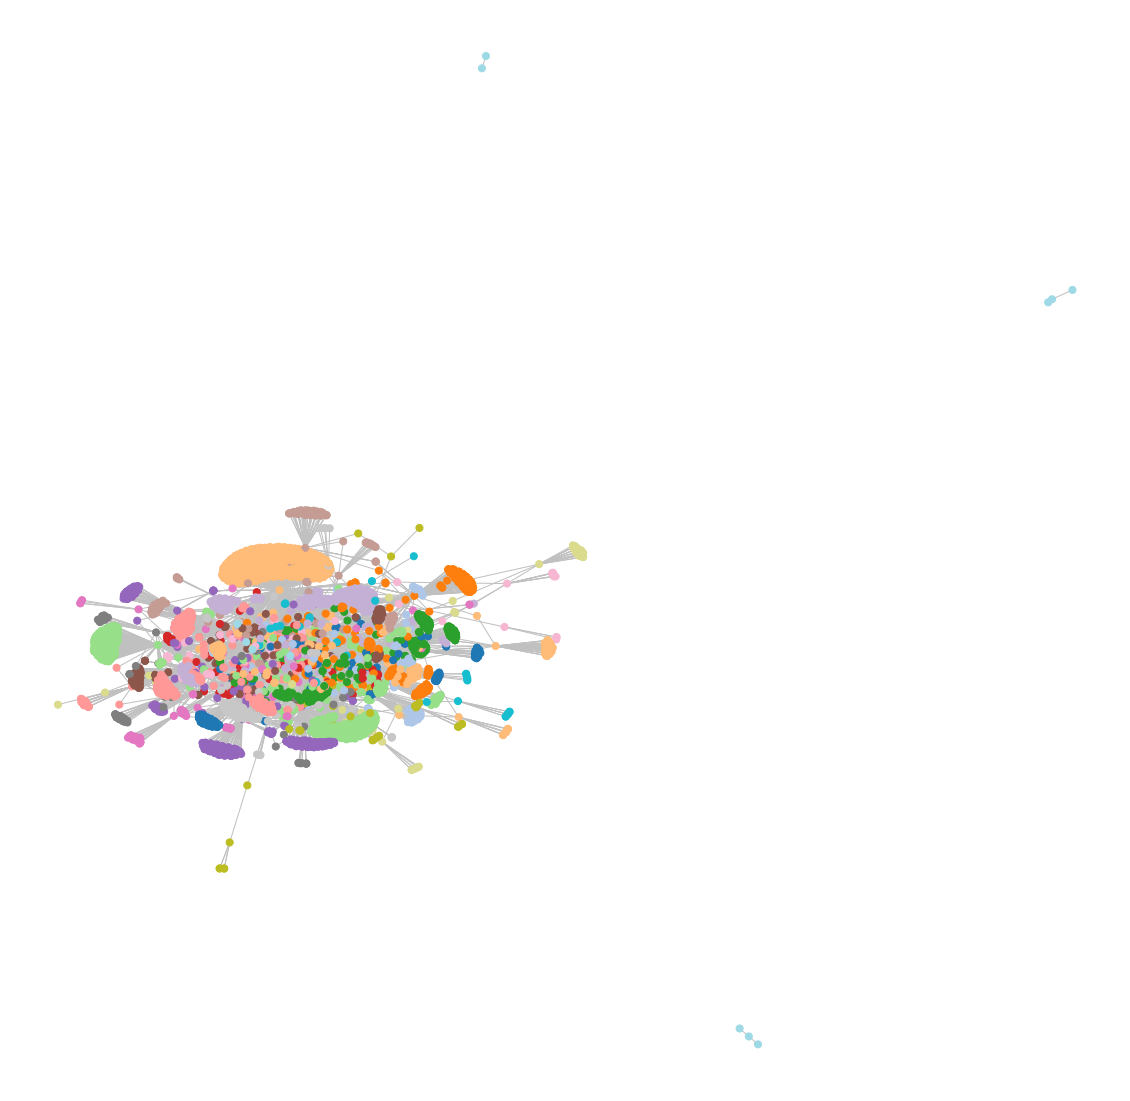

In [94]:
figure(figsize=(20, 20))
mc.draw_graph(matrix, clusters, node_size=50, with_labels=False, edge_color="silver")

In [95]:
Q = mc.modularity(matrix=result, clusters=clusters)

In [96]:
print(Q)

0.920894198234392


In [ ]:
# in theory we should try different inflation values and chose 
# the one that maximizes the modularity, but it's already pretty big

In [97]:
with open("clusters.csv","w", newline="") as f:
  cw = csv.writer(f)
  cw.writerows(clusters)

In [13]:
from scipy.stats import hypergeom

In [98]:
print(len(clusters))
print(len(max(clusters,key=len)))

97
776


In [99]:
print(clusters)

[(0, 2, 2273), (1, 207, 397, 1221, 1222, 1225, 1228, 1229, 1232, 1234, 1235, 1238, 1240, 1241, 1242, 1243, 1245, 1247, 1248, 1249, 1253, 1255, 1257, 1262, 1263, 1264, 1267, 1268, 1270, 1271, 1272, 1273, 1275, 1276, 1289, 1290, 1293, 1294, 1295, 1299, 1555, 1792, 1797, 1939, 2321, 2324, 2762, 2792, 2807, 2818, 3080, 3084, 3133, 3134, 3557, 3752, 3786, 3882, 4131, 4132), (3, 1251, 1415, 1759, 2713, 3150, 3151), (4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 246, 268, 414, 1335, 1367, 1442, 1598, 1918, 1924, 1948, 2185, 2769, 2780, 3403, 3415, 3556, 3781, 4158), (9, 261, 262, 263, 1172, 1176, 1177, 1758, 1920, 1944, 2285, 2550, 2699, 2744, 2746, 2748, 2760, 2782, 2783, 3086, 3088, 3641, 3749, 3750, 3793, 3823, 4093, 4130, 4137), (14, 139, 140, 196, 225, 226, 227, 228, 229, 230, 232, 233, 235, 236, 237, 238, 239, 240, 241, 433, 466, 1316, 1530, 2308, 2758, 2793, 3382, 3427), (19, 141, 143, 179, 1829, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1988), (26, 29, 30, 31,

In [100]:
# con almeno 10 nodi 
big_clusters = []
for c in clusters:
  if len(c)>= 10:
    big_clusters.append(c)

len(big_clusters)

61

In [101]:
#prendiamo i seed genes da R 
tmp = pd.read_csv('seed genes.csv', index_col=0)
tmp.head()
seeds = list(tmp["x"])
print(seeds)
print(len(seeds))

['ABAT', 'ABCC2', 'ACAT1', 'ACHE', 'ADCYAP1', 'ADORA2A', 'ADRA1B', 'AGT', 'ALAD', 'ALPL', 'APEX1', 'APOE', 'ATP7A', 'BCHE', 'BDNF', 'CAT', 'CCK', 'CDKL5', 'CHAT', 'CHRM1', 'CHRNA3', 'CHRNA4', 'CHRNA5', 'CHRNA7', 'CHRNB4', 'CLU', 'CNNM2', 'CNR1', 'CRH', 'CYP11A1', 'DRD1', 'DRD2', 'DRD3', 'FAAH', 'FGF2', 'FOS', 'FOXG1', 'GABRA5', 'GAD2', 'GAMT', 'GHRL', 'GNB3', 'GRIK1', 'HCN1', 'HTR1A', 'HTR1B', 'IDH2', 'IFNB1', 'IL1B', 'IL6', 'IMPA1', 'INS', 'KCNA2', 'KCNJ11', 'KCNQ2', 'LEP', 'LETM1', 'MECP2', 'MIB1', 'MPDZ', 'MT3', 'NGF', 'NGFR', 'NOS1', 'NOS2', 'NPY', 'NRP2', 'OPRK1', 'OPRM1', 'OXT', 'PAM', 'PDYN', 'PIGM', 'PLPPR1', 'PNKP', 'POLG', 'POMC', 'PRKCD', 'PTGS2', 'PVALB', 'RBFOX1', 'REST', 'SIGMAR1', 'SLC12A5', 'SLC17A7', 'SLC1A1', 'SLC2A1', 'SLC30A1', 'SLC6A1', 'SLC6A2', 'SLC8A1', 'SLC8A3', 'SOD2', 'SST', 'SSTR2', 'SYN2', 'TBCD', 'TCF4', 'TRH', 'TSC1', 'TSC2']
101


In [102]:
print(G.nodes)

['A2M', 'APOE', 'LEP', 'NGF', 'ABAT', 'ACP6', 'ADSL', 'AKR1B1', 'CBS', 'ENO1', 'ESD', 'FAH', 'FAHD1', 'FKBP3', 'GPI', 'HINT2', 'HMGCS1', 'HSD17B14', 'HSPE1', 'PDCD6IP', 'PGM1', 'PGM2', 'PYURF', 'QDPR', 'RAD23B', 'SORD', 'ABCC2', 'AP2M1', 'ATP6V1B1', 'ATP6V1E1', 'AZIN1', 'CLTC', 'HSPA4', 'JUP', 'MCPH1', 'MRPL10', 'MRPL23', 'MRPL24', 'MRPL37', 'MRPL57', 'MRPS26', 'MRPS28', 'MRPS35', 'NDUFA10', 'NDUFA2', 'NDUFA9', 'NDUFB9', 'NDUFS8', 'NFKB1', 'OXA1L', 'PDZD3', 'PDZK1', 'PICALM', 'PRR3', 'PTRH2', 'RAB11B', 'RAB14', 'RAB31', 'SHANK3', 'SLC30A5', 'SLC9A3R1', 'SSR1', 'SYNJ2BP', 'TCIRG1', 'TOMM20', 'TOMM22', 'TOMM70A', 'TUBB3', 'UBQLN1', 'UQCRFS1', 'VAMP2', 'ABCC8', 'KCNJ11', 'ABCE1', 'ACAT1', 'APEX1', 'TBCD', 'ABHD5', 'GAD2', 'ABL1', 'CAT', 'FOS', 'ABL2', 'ACAA1', 'ACAA2', 'IDH2', 'ACACA', 'SOD2', 'ACAD9', 'LETM1', 'SLC2A1', 'ABCB7', 'AGXT', 'AK2', 'AK3', 'C15orf48', 'COX17', 'CRIP1', 'CSE1L', 'DDB1', 'DLD', 'DUS3L', 'ERCC2', 'ILVBL', 'MDH2', 'NIT2', 'PDHA1', 'PDP1', 'PRDX1', 'PRDX5', 'RAB7A'

In [103]:
# I need the IDs of the seeds, because the clusters are made of ids 
# let's check if the order thing is correct
nodi = list(G.nodes)
print(nodi.index("APOE")) 
# I know that he has a degree of 128 (Dario's code), so if the id is actually 1, the cluster 
# in which the id 1 appears should have around 128 elements
# Id 1 appears in cluster number 1, let's check. MMM boh
print(len(clusters[1]))

1
60


In [110]:
prova = [item for sublist in clusters for item in sublist]
print(prova)
print(min(prova), max(prova))
print(matrix.shape)
prova.sort()
print( [*range(0,4160)] == prova)

# the ids are exactly the same as the matrix row! It should work then

[0, 2, 2273, 1, 207, 397, 1221, 1222, 1225, 1228, 1229, 1232, 1234, 1235, 1238, 1240, 1241, 1242, 1243, 1245, 1247, 1248, 1249, 1253, 1255, 1257, 1262, 1263, 1264, 1267, 1268, 1270, 1271, 1272, 1273, 1275, 1276, 1289, 1290, 1293, 1294, 1295, 1299, 1555, 1792, 1797, 1939, 2321, 2324, 2762, 2792, 2807, 2818, 3080, 3084, 3133, 3134, 3557, 3752, 3786, 3882, 4131, 4132, 3, 1251, 1415, 1759, 2713, 3150, 3151, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 246, 268, 414, 1335, 1367, 1442, 1598, 1918, 1924, 1948, 2185, 2769, 2780, 3403, 3415, 3556, 3781, 4158, 9, 261, 262, 263, 1172, 1176, 1177, 1758, 1920, 1944, 2285, 2550, 2699, 2744, 2746, 2748, 2760, 2782, 2783, 3086, 3088, 3641, 3749, 3750, 3793, 3823, 4093, 4130, 4137, 14, 139, 140, 196, 225, 226, 227, 228, 229, 230, 232, 233, 235, 236, 237, 238, 239, 240, 241, 433, 466, 1316, 1530, 2308, 2758, 2793, 3382, 3427, 19, 141, 143, 179, 1829, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1988, 26, 29, 30, 31, 33, 34, 35, 36

In [111]:
# let's assume it's right and create the seed id list 
seeds_id = []
for s in seeds:
  if s in nodi: #apprently one seed gene is not in our disease interactome (no interactions?)
    seeds_id.append(nodi.index(s))

print(seeds_id)
print(len(seeds_id))

[4, 26, 74, 127, 150, 142, 194, 125, 140, 250, 75, 1, 130, 1375, 1405, 80, 1538, 1563, 1601, 1558, 1614, 1639, 1463, 149, 2924, 178, 1321, 1720, 1744, 1794, 143, 1327, 1913, 1805, 202, 81, 1304, 2146, 78, 1372, 2190, 267, 1768, 1769, 1997, 138, 85, 2325, 1466, 1770, 1456, 147, 1461, 72, 1319, 2, 89, 221, 265, 262, 4026, 3, 270, 1404, 1449, 1344, 1347, 2143, 1430, 1459, 1329, 2765, 1608, 1358, 134, 1374, 145, 218, 3889, 1946, 208, 222, 1549, 1831, 1441, 90, 1350, 1832, 136, 1771, 3837, 87, 3400, 1736, 1324, 76, 198, 2767, 199, 244]
100


In [ ]:
# M = population
# n = object with features
# N = draws
# x = succes in draws

In [112]:
# Looking for putative disease modules
pdm = []
population = len(G.nodes)
obj_with_features = len(seeds_id)

for bc in big_clusters:
  sample_size = len(bc)
  successi = len(list(set(bc) & set(seeds_id)))
  print(successi)
  pval = hypergeom.sf(successi-1, population, obj_with_features, sample_size)
  #print(pval)
  if pval < 0.05:
    pdm.append(bc)
    print(pval)


1
1
1
1
1
1
1
2
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [113]:
pdm

[]